# S A Herdev Anish (1RVU23CSE385)

In [13]:
!pip install gensim scikit-learn matplotlib
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

In [14]:
nltk.download('punkt')
nltk.download('punkt_tab') # Added to download the missing resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
# Sample corpus
corpus = [
    "The king ruled the kingdom with wisdom and power.",
    "A young prince will one day become king.",
    "The queen is married to the king.",
    "The princess is the daughter of the king and queen.",
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic meanings",
    "NLP is used in chatbots and virtual assistants",
    "Word2Vec is a powerful tool for creating word embeddings",
    "Machine learning algorithms are essential for AI",
    "Deep learning networks analyze complex data",
    "Artificial intelligence is transforming industries",
    "Data science involves collecting and interpreting data",
    "Neural networks mimic the human brain",
    "Computer vision enables machines to see"
]

# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

model = Word2Vec.load("word2vec.model")

# Get vectors for a subset of words
words = list(model.wv.index_to_key)[:10]  # Select the first 10 words
print(words)
word_vectors = [model.wv[word] for word in words]
print(word_vectors)

[['the', 'king', 'ruled', 'the', 'kingdom', 'with', 'wisdom', 'and', 'power', '.'], ['a', 'young', 'prince', 'will', 'one', 'day', 'become', 'king', '.'], ['the', 'queen', 'is', 'married', 'to', 'the', 'king', '.'], ['the', 'princess', 'is', 'the', 'daughter', 'of', 'the', 'king', 'and', 'queen', '.'], ['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'meanings'], ['nlp', 'is', 'used', 'in', 'chatbots', 'and', 'virtual', 'assistants'], ['word2vec', 'is', 'a', 'powerful', 'tool', 'for', 'creating', 'word', 'embeddings'], ['machine', 'learning', 'algorithms', 'are', 'essential', 'for', 'ai'], ['deep', 'learning', 'networks', 'analyze', 'complex', 'data'], ['artificial', 'intelligence', 'is', 'transforming', 'industries'], ['data', 'science', 'involves', 'collecting', 'and', 'interpreting', 'data'], ['neural', 'networks', 'mimic', 'the', 'human', 'brain'], ['computer', 'vision', 'enables', 'machines', 'to', 'see']]
['th

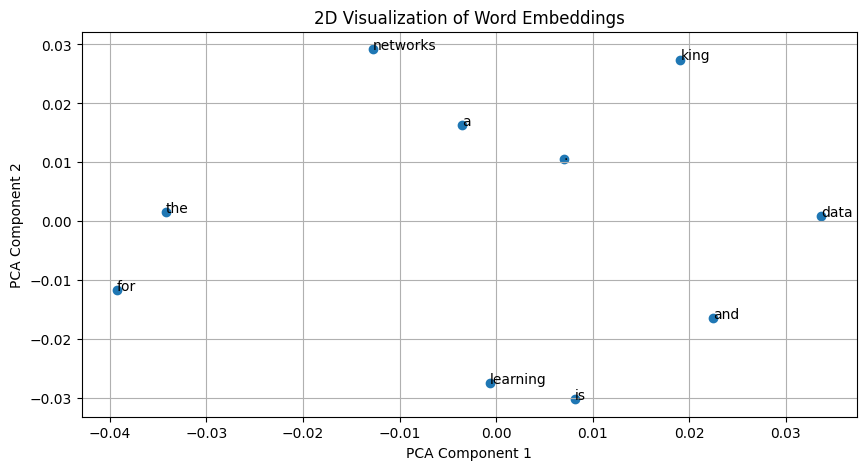

In [16]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

import matplotlib.pyplot as plt

# Plot the words in 2D space
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate the points with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()